# Support Vector Machine Tutorial.
## Multi-class classifier



# Iris Dataset
## https://archive.ics.uci.edu/ml/datasets/iris
# Fields description follow:
## 1. sepal length in cm
## 2. sepal width in cm
## 3. petal length in cm
## 4. petal width in cm
## 5. class:
## -- Iris Setosa
## -- Iris Versicolour
## -- Iris Virginica



In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.

In [2]:
all_ds = pd.read_csv('iris_dataset.csv')
all_ds

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
print(f'Number of rows/examples and columns in the dataset: {all_ds.shape}')

Number of rows/examples and columns in the dataset: (150, 5)


In [4]:
# Summary of information on the dataset.
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


# Cleaning the data.

In [5]:
print("Display NA values in each columns: ")
all_ds.isna().sum(axis=0)

Display NA values in each columns: 


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
print("Display NULL values in each columns: ")
all_ds.isnull().sum()

Display NULL values in each columns: 


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
all_ds = all_ds.dropna()

In [8]:

all_ds = all_ds.sample(frac=1) # This will randomly shuffle the rows to make sure the data is not sorted. (if the data is sorted then we may end up with test dataset from one or two classes only)


# Split the data into train/test splits.

In [9]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
train_dataset, temp_test_dataset =  train_test_split(all_ds, test_size=0.4)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(90, 5)
(60, 5)


In [10]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 60% train, 20% validate, and 20% test]
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(30, 5)
(30, 5)


In [11]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Trai dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Trai dataset       : (90, 5)
 Test dataset       : (30, 5)
 Validation dataset : (30, 5)


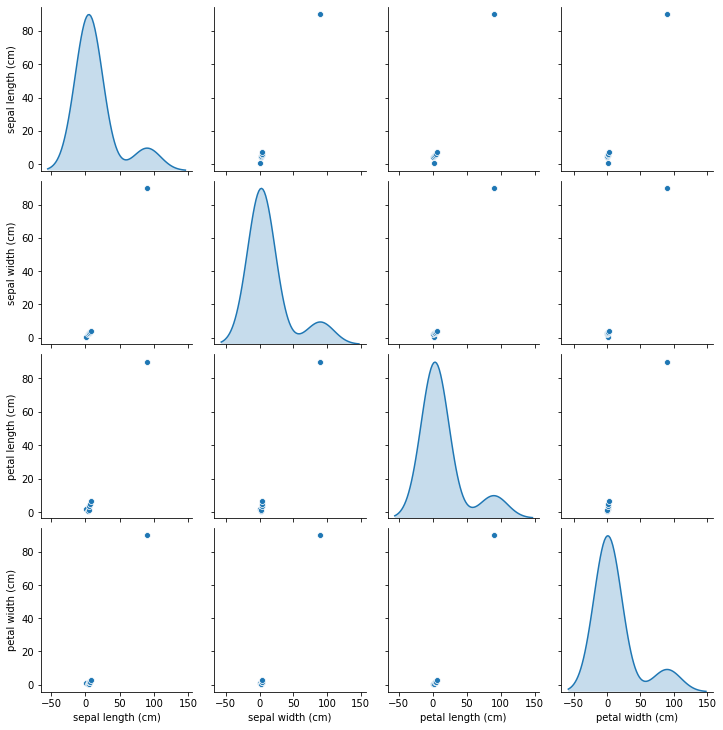

In [12]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_dataset.describe()
train_stats.pop("target")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'


In [13]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("target")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),90.0,5.750000,0.825744,4.3,5.1,5.60,6.300,7.7
sepal width (cm),90.0,3.060000,0.447163,2.0,2.8,3.00,3.375,4.2
petal length (cm),90.0,3.622222,1.808642,1.1,1.5,4.05,5.100,6.9
petal width (cm),90.0,1.160000,0.780636,0.1,0.3,1.30,1.800,2.5


In [14]:

train_labels = train_dataset.pop('target')
test_labels = test_dataset.pop('target')
valid_labels = valid_dataset.pop('target')

# Data Normalization/Scaling
## Subtract the mean of the training data and divide by the standard deviation of the training data.

In [15]:
# define a function to normalize the data set.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)


In [16]:
# show a sample of the data after normalized
normed_train_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
125,1.755991,0.313085,1.314676,0.819844
136,0.666066,0.760349,1.093515,1.588447
56,0.666066,0.536717,0.595904,0.563643
24,-1.150477,0.760349,-0.952218,-1.229766
117,2.361505,1.654876,1.701706,1.332246
0,-0.787168,0.983980,-1.228669,-1.229766
21,-0.787168,1.431244,-1.173379,-0.973565
17,-0.787168,0.983980,-1.228669,-1.101665
115,0.787168,0.313085,0.927645,1.460347
140,1.150477,0.089453,1.093515,1.588447


# Training the model 
## more details here:
## https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [17]:
#Create a svm Classifier
model = svm.SVC(C = 1, # reg paramater
                kernel='linear', #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
               ) # Linear Kernel

#Train the model using the training sets
model.fit(normed_train_data, train_labels)

#Predict the response for test dataset
y_pred = model.predict(normed_test_data)

In [18]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([0., 1., 2., 2., 1., 0., 1., 1., 2., 1.])

# See how the training went

In [19]:
from sklearn import metrics
y_pred = model.predict(normed_train_data)
print("Accuracy:",metrics.accuracy_score(train_labels, y_pred))

Accuracy: 0.9777777777777777


In [20]:
y_pred = model.predict(normed_valid_dataset)
print("Accuracy:",metrics.accuracy_score(valid_labels, y_pred))

Accuracy: 1.0


In [21]:
y_pred = model.predict(normed_test_data)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.9333333333333333


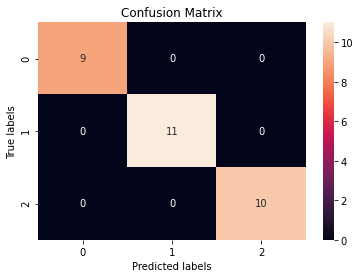

In [22]:
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(normed_test_data)

cm = confusion_matrix(predict_results, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);
